# Avaliação e validação de experimentos


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)

SEED = 17

Durante o curso, trabalharemos ba base de dados [Automobile](https://archive.ics.uci.edu/ml/datasets/Automobile) da UCI.  Esta base contém características de diversos automóveis e o risco (em termos de seguro) de cada um deles.  Consideraremos que as bases estão armazenadas em um arquivo [CSV](https://en.wikipedia.org/wiki/Comma-separated_values).

> Não esqueça de carregar o arquivo `imports85.csv` antes de rodar o código abaixo.

In [3]:
df_raw = pd.read_csv('data/imports85.csv')
print(df_raw.shape)

(205, 26)


In [4]:
df_raw.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
symboling,3,3,1,2,2,2,1,1,1,0,2,0,0,0,1
normalizedlosses,?,?,?,164,164,?,158,?,158,?,192,192,188,188,?
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,bmw,bmw,bmw,bmw,bmw
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,std,std,std,std,std
numofdoors,two,two,two,four,four,two,four,four,four,two,two,four,two,four,four
bodystyle,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,sedan,sedan,sedan,sedan,sedan
drivewheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,101.2,101.2,101.2,101.2,103.5


In [5]:
# Remover os "?" e colocar nan no lugar, converter as colunas para float

df = df_raw.replace("?", np.nan).apply(pd.to_numeric, errors="ignore")

df.info()
# df.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   normalizedlosses  164 non-null    float64
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numofdoors        203 non-null    object 
 6   bodystyle         205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  numofcylinders    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

/var/folders/c6/vss0yj1j115_3ykhy6lb4kcw0000gn/T/ipykernel_7841/668123047.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df_raw.replace("?", np.nan).apply(pd.to_numeric, errors="ignore")


In [6]:
# To simplify the code, we will only use numeric features

X = df.drop(columns=['symboling', 'normalizedlosses', 'numofcylinders', 'numofdoors'])
X = X.select_dtypes(exclude=['object'])


yreg = df.symboling
ycla = yreg > 0

print(X.shape)

(205, 14)


## Classificação

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [8]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=SEED)
gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

algorithms = {
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]),
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),


    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=SEED))]),
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),


    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=SEED))]),
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),


    'nb': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]),
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),


    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=SEED))]),
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),

        
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=SEED)),
            ('svm', SVC(kernel='rbf', random_state=SEED))]),
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [9]:
from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X, ycla, cv=cv)

result = pd.DataFrame.from_dict(result)

In [10]:
print(result)

         kNN      tree   bigtree        nb  svmlinear    svmrbf
0   0.714286  0.928571  0.928571  0.714286   0.642857  0.785714
1   0.928571  1.000000  1.000000  0.785714   0.785714  0.928571
2   0.714286  0.785714  0.928571  0.714286   0.714286  0.785714
3   0.857143  0.785714  0.785714  0.714286   0.642857  0.857143
4   0.785714  0.785714  0.785714  0.714286   0.642857  0.785714
5   0.857143  0.785714  0.785714  0.785714   0.571429  0.857143
6   1.000000  1.000000  1.000000  0.642857   0.714286  0.714286
7   0.928571  1.000000  1.000000  0.785714   0.714286  0.785714
8   0.785714  0.857143  0.857143  0.857143   0.714286  0.928571
9   1.000000  0.928571  0.928571  0.857143   1.000000  1.000000
10  1.000000  1.000000  1.000000  0.769231   0.846154  1.000000
11  0.923077  0.769231  1.000000  0.615385   0.615385  0.769231
12  1.000000  1.000000  1.000000  0.923077   0.923077  0.923077
13  0.769231  0.923077  0.923077  0.846154   0.846154  0.769231
14  0.846154  1.000000  1.000000  0.7692

In [11]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.87 ± 0.10
tree         0.90 ± 0.10
bigtree      0.93 ± 0.09
nb           0.77 ± 0.08
svmlinear    0.73 ± 0.12
svmrbf       0.84 ± 0.09
dtype: object

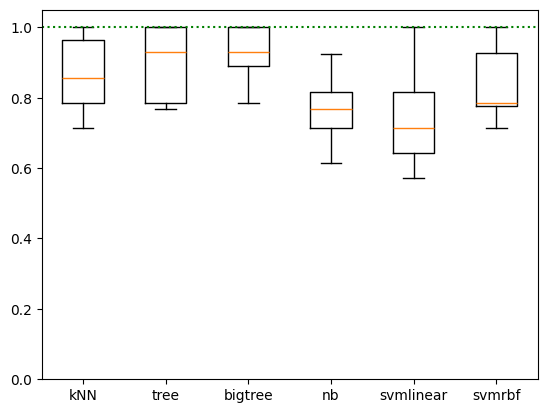

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result.items()])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)

plt.axhline(1, linestyle="dotted", color="green")
plt.ylim(0,1.05)  # Nao mentir com dados para os coleguinhas

plt.show()

## Comparar desempenho (validar hipótese)

In [13]:
from scipy.stats import wilcoxon

In [14]:
# Comparar dois algoritmos:
wilcoxon(result.kNN, result.tree)

WilcoxonResult(statistic=np.float64(21.0), pvalue=np.float64(0.27131547988984783))

In [15]:
# Comparar todos contra todos: Friedman + Nemenyi (further reading), construir um diagrama de diferença crítica
# Orange3

## Melhor modelo (deploying)

In [16]:
classifier = algorithms['bigtree']
classifier.fit(X, ycla) # Uso a base toda!
print(classifier.best_estimator_)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('tree', DecisionTreeClassifier(random_state=17))])


In [17]:
x = X.iloc[0:1, :]
print(x) # Faz de conta que é novo

   wheelbase  length  width  height  curbweight  enginesize  bore  stroke  \
0       88.6   168.8   64.1    48.8        2548         130  3.47    2.68   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0       111.0   5000.0       21          27  13495.0  


In [18]:
classifier.predict(x)

array([ True])

### Um outro modelo

In [19]:
classifier = algorithms['svmrbf']
classifier.fit(X, ycla) # Uso a base toda
print(classifier.best_estimator_)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=10, random_state=17)),
                ('svm', SVC(gamma=1.0, random_state=17))])


In [20]:
print(x)
x.iloc[0, 13] = np.nan
print(x)
classifier.predict(x)

   wheelbase  length  width  height  curbweight  enginesize  bore  stroke  \
0       88.6   168.8   64.1    48.8        2548         130  3.47    2.68   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0       111.0   5000.0       21          27  13495.0  
   wheelbase  length  width  height  curbweight  enginesize  bore  stroke  \
0       88.6   168.8   64.1    48.8        2548         130  3.47    2.68   

   compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
0               9.0       111.0   5000.0       21          27    NaN  


array([ True])

## Regressão

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer

In [22]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
algorithms = {}